<a href="https://colab.research.google.com/github/LU-ZT/Deep-Learning-with-PyTorch/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

## 2.1 Tensor fundamentals

In [2]:
a = torch.ones(3)
print(a)
print(a[1])
print(float(a[1]))
a[2]=2
print(a)

tensor([1., 1., 1.])
tensor(1.)
1.0
tensor([1., 1., 2.])


you can use a one-dimensional tensor by storing $x$s in the even indices and $y$s in the odd indices, like so:

In [3]:
points = torch.zeros(6)
points[0] = 1.0
points[1] = 4.0
points[2] = 2.0
points[3] = 1.0
points[4] = 3.0
points[5] = 5.0
print(points)

points = torch.tensor([1.0, 4.0, 2.0, 1.0, 3.0, 5.0])
print(points)

tensor([1., 4., 2., 1., 3., 5.])
tensor([1., 4., 2., 1., 3., 5.])


to get the coordinates of the first point:

In [4]:
float(points[0]), float(points[1])

(1.0, 4.0)

For this purpose, you can use a 2D tensor:

In [5]:
points = torch.tensor([[1.0, 4.0], [2.0,1.0], [3.0, 5.0]])
print(points)

print(points.shape)

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
torch.Size([3, 2])


You could also use `zeros` or `ones` to initialize the tensor, providing the size as a tuple:

In [6]:
points = torch.zeros(3,2)
print(points)

points = torch.zeros((3,2))
print(points)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


Now you can access an individual element in the tensor by using two indices:

In [7]:
points = torch.FloatTensor([[1.0, 4.0], [2.0,1.0], [3.0, 5.0]])
print(points)

print(points[0,1])

print(points[0])

print(points[:,1])

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
tensor(4.)
tensor([1., 4.])
tensor([4., 1., 5.])


## 2.2 Tensors and storages

A *storage* is a one-dimensional array of numerical data, such as a contiguous block of memory containing numbers of a given type. 

Multiple tensors can index the same storage even if they index into the data differently. 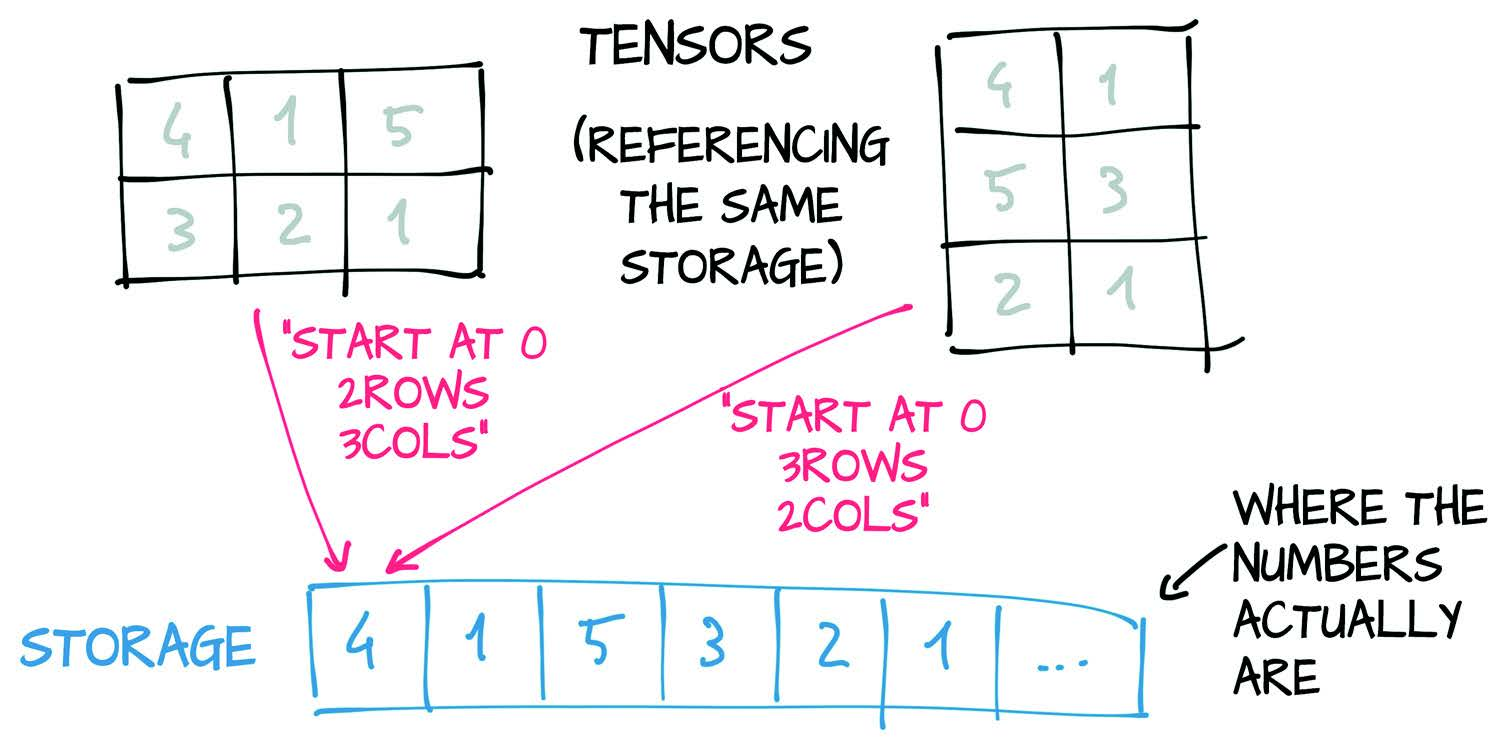

The layout of a storage is always one-dimensional, irrespective of the dimensionality of any tensors that may refer to it. 

You can access the storage for a given tensor by using the `.storage` property:

In [8]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print(points.storage())

points_storage = points.storage()
print(points_storage[0])

print(points.storage()[1])

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]
1.0
4.0


At this point, it shouldn’t come as a surprise that changing the value of a storage changes the content of its referring tensor: 

In [9]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print(points)

points_storage = points.storage()
points_storage[0] = 2.0
print(points)

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
tensor([[2., 4.],
        [2., 1.],
        [3., 5.]])


## 2.3 Size, storage offset, and strides

The ***size*** (or ***shape***, in NumPy parlance) is a tuple indicating how many elements across each dimension the tensor represents. 

The ***storage offset*** is the index in the storage that corresponds to the first element in the tensor.

The ***stride*** is the number of elements in the storage that need to be skipped to obtain the next element along each dimension.

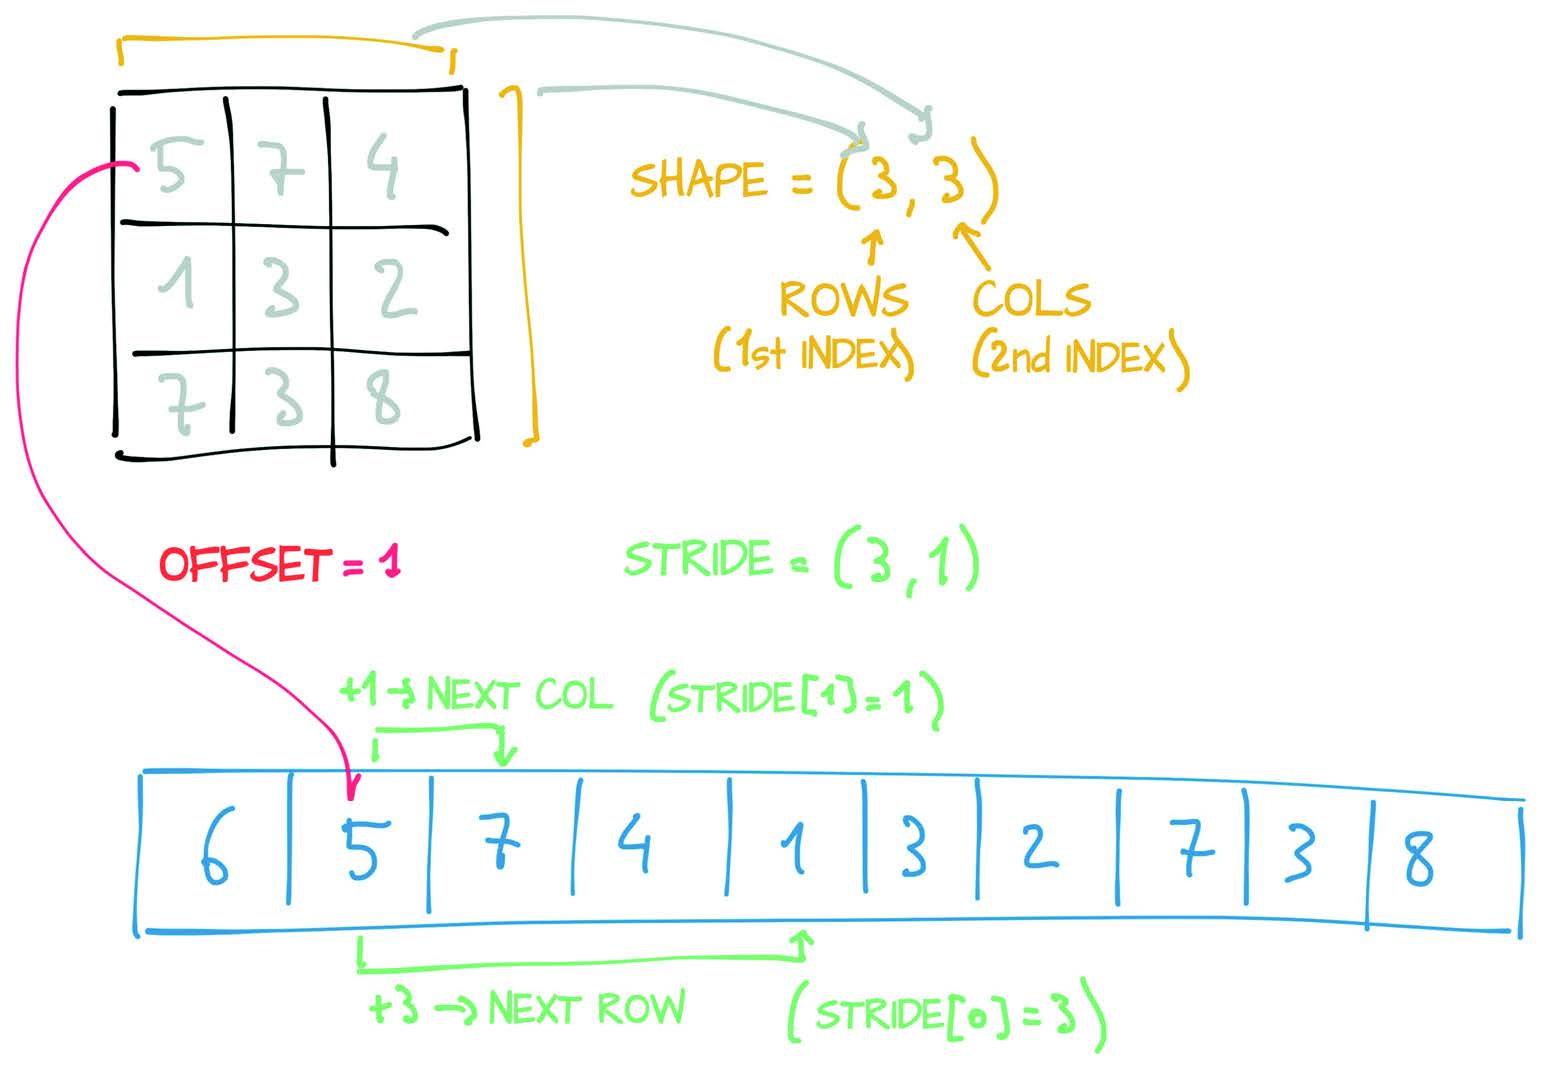

Accessing an element $i, j$ in a 2D tensor results in accessing the $$\text{storage_offset} + \text{stride}[0] * i + \text{stride}[1] * j$$ element in the storage. 

The offset will usually be zero; if this tensor is a view into a storage created to hold a larger tensor the offset might be a positive value.

In [10]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
second_point = points[1]
print("second_point.storage_offset() = ", second_point.storage_offset())
print("second_point.size() = ", second_point.size())
print("second_point.shape = ", second_point.shape)
print("second_point.stride() = ", second_point.stride())
print("points.stride() = ",points.stride())

second_point.storage_offset() =  2
second_point.size() =  torch.Size([2])
second_point.shape =  torch.Size([2])
second_point.stride() =  (1,)
points.stride() =  (2, 1)


Important note: 


*   `size` class has the same information contained in the `shape` property of tensor objects. ( `points.size()` $\Leftrightarrow$ `points.shape` )
*   `second_point` and `points` have some common storages. 

Some operations, such as transposing a tensor or extracting a subtensor, don’t lead to memory reallocations; instead, they consist of allocating a new tensor object with a different value for size, storage offset, or stride.

In [11]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
second_line_point = points[:,1]

print(points)
print(second_line_point)

print(second_line_point.size())
print(second_line_point.storage_offset())
print(second_line_point.stride())

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
tensor([4., 1., 5.])
torch.Size([3])
1
(2,)


Bottom line, the subtensor has one fewer dimension (as you’d expect) while still indexing the same storage as the original `points` tensor. Changing the subtensor has a side effect on the original tensor too:

In [12]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print(points)
second_point = points[1]
second_point[0] = 10.0
print(points)

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
tensor([[ 1.,  4.],
        [10.,  1.],
        [ 3.,  5.]])


This effect may not always be desirable, so you can eventually clone the subtensor into a new tensor:

In [13]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print(points)
second_point = points[1].clone()
second_point[0] = 10.0
print(points)
print(second_point)

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
tensor([10.,  1.])


Transpose a tensor. 
You can easily verify that the two tensors share storage and that they differ only in shape and stride:

In [14]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print(points)

points_t = points.t()
print(points_t)

print(id(points.storage()) == id(points_t.storage()))

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
tensor([[1., 2., 3.],
        [4., 1., 5.]])
True


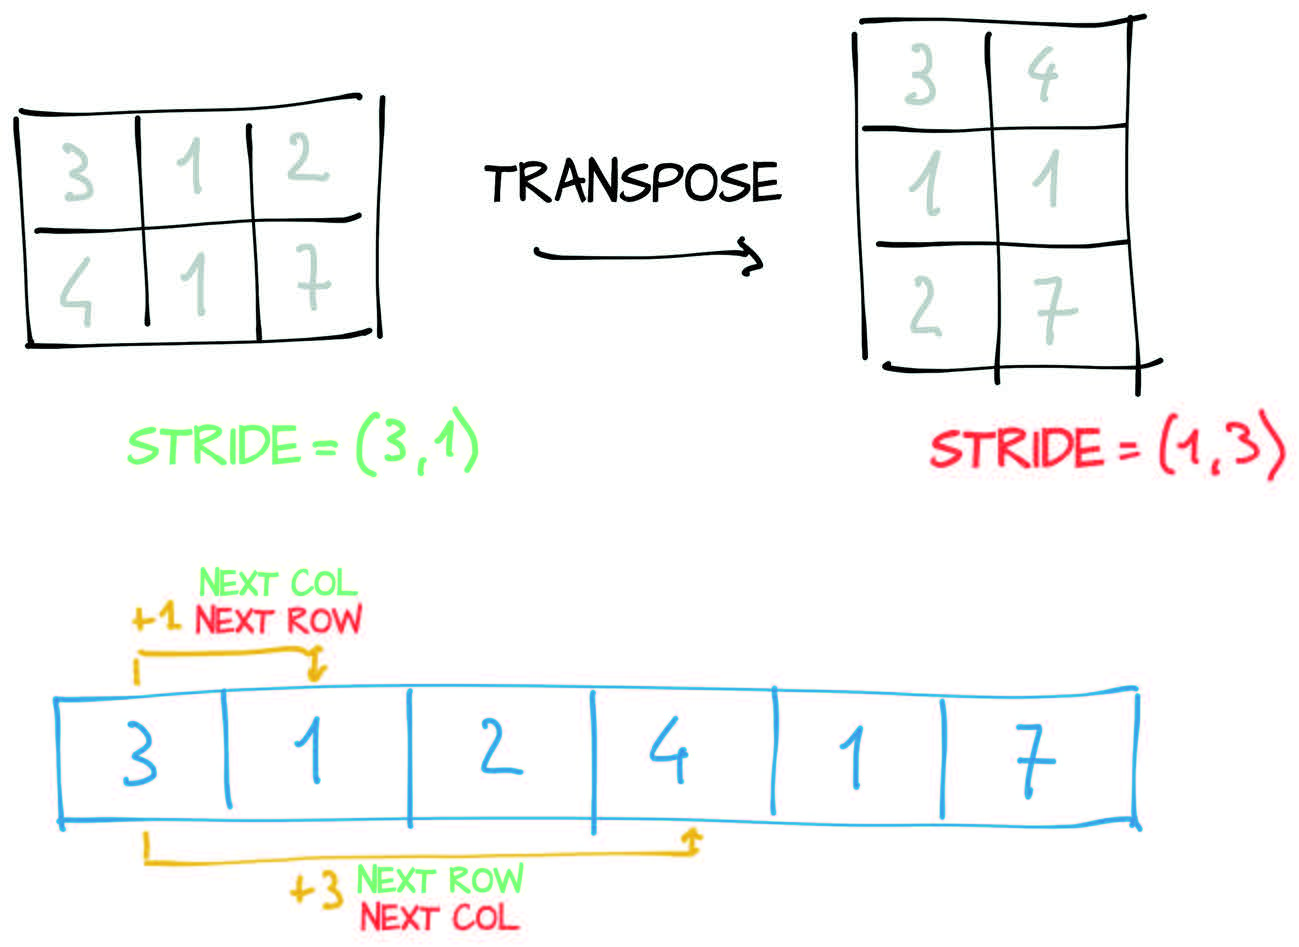

Transposing in PyTorch isn’t limited to matrices. You can transpose a multidimensional array by specifying the two dimensions along which transposing (such as flipping shape and stride) should occur:

In [15]:
some_tensor = torch.ones(3,4,5)
some_tensor_t = some_tensor.transpose(0,2)
print(some_tensor_t.size())

print(some_tensor.stride())
print(some_tensor_t.stride())

torch.Size([5, 4, 3])
(20, 5, 1)
(1, 5, 20)


A tensor whose values are laid out in the storage starting from the rightmost dimension onward (moving along rows for a 2D tensor, for example) is defined as being ***contiguous***. 

In this case, `points` is contiguous but its transpose is not:

In [16]:
print(points.is_contiguous())
print(points_t.is_contiguous())

some_tensor = torch.ones(3,4,5)
some_tensor_t = some_tensor.transpose(0,1)
print(some_tensor.is_contiguous())
print(some_tensor_t.is_contiguous())

True
False
True
False


You can obtain a new contiguous tensor from a noncontiguous one by using the `contiguous` method.

`points_t.contiguous()` is a new tensor and has its own storage. 

The content of the tensor stays the same, but the stride changes, as
does the storage:

In [17]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print("points_t : ")
points_t = points.t()
print(points_t)
print(points_t.storage())
print(points_t.stride())

print("\npoints_t_cont : ")
point_t_cont = points_t.contiguous()
print(point_t_cont)
print(point_t_cont.storage())
print(point_t_cont.stride())

points_t : 
tensor([[1., 2., 3.],
        [4., 1., 5.]])
 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]
(1, 2)

points_t_cont : 
tensor([[1., 2., 3.],
        [4., 1., 5.]])
 1.0
 2.0
 3.0
 4.0
 1.0
 5.0
[torch.FloatStorage of size 6]
(3, 1)


## 2.4 Numeric types

Here's a list of the possible values for the `dtype` argument: 
* `torch.float32` or `torch.float` —— 32-bit floating-point
* `torch.float64` or `torch.double` —— 64-bit, double-precision floating-point
* `torch.float16` or `torch.half` —— 16-bit, half-precision floating-point
* `torch.int8` —— Signed 8-bit integers
* `torch.uint8` —— Unsigned 8-bit integers
* `torch.int16` or `torch.short` —— Signed 16-bit integers
* `torch.int32` or `torch.int` —— Signed 32-bit integers
* `torch.int64` or `torch.long` —— Signed 64-bit integers


Corresponding Class:
* Each of `torch.float`, `torch.double`, and so on has a corresponding concrete class of `torch.FloatTensor`, `torch.DoubleTensor`, and so on. 
* The class for `torch.int8` is `torch.CharTensor`. 
* The class for `torch.uint8` is `torch.ByteTensor`. 
* `torch.Tensor` is an alias for `torch.FloatTensor`. 



In [18]:
double_points = torch.ones(10,2,dtype=torch.double)
short_points = torch.tensor([[1,2],[3,4]],dtype=torch.short)

print(double_points.dtype)
print(short_points.dtype)

torch.float64
torch.int16


In [19]:
double_points = torch.zeros(10, 2).double()
short_points = torch.ones(10, 2).short()

print(double_points.dtype)
print(short_points.dtype)

torch.float64
torch.int16


In [20]:
double_points = torch.zeros(10,2).to(torch.double)
short_points = torch.ones(10,2).to(dtype=torch.short)

print(double_points.dtype)
print(short_points.dtype)

torch.float64
torch.int16


In [24]:
points = torch.randn(10,2)
short_points = points.type(torch.short)

print(points.dtype)
print(short_points.dtype)

torch.float32
torch.int16


## 2.5 Indexing tensor

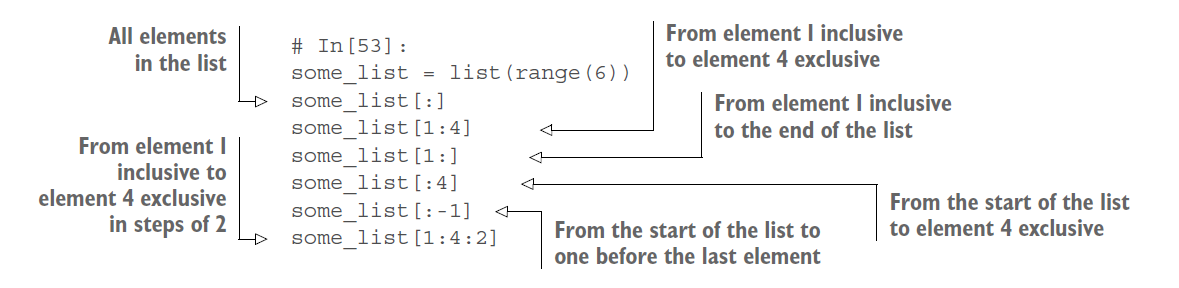

To achieve your goal, you can use the same notation for PyTorch tensors, with the added benefit that as in NumPy and in other Python scientific libraries, we can use range indexing for each dimension of the tensor:

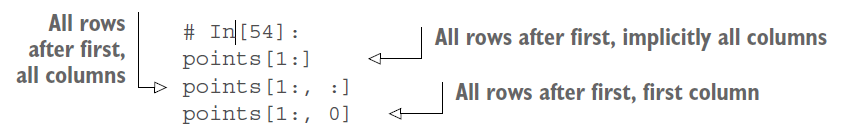

In [30]:
some_list = list(range(6))
print(some_list)
print(some_list[1:4])
print(some_list[:-1])
print(some_list[1:4:2])

[0, 1, 2, 3, 4, 5]
[1, 2, 3]
[0, 1, 2, 3, 4]
[1, 3]


## 2.6 NumPy interoperability

PyTorch tensors can be converted to NumPy arrays and vice versa efficiently

In [38]:
points = torch.ones(3,4)
points_np = points.numpy()
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

Conversely, you can obtain a PyTorch tensor from a NumPy array this way

In [42]:
points = torch.from_numpy(points_np)
points

tensor([[  1., 111.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]])

Interestingly, the returned array shares an underlying buffer with the tensor
storage. 


* As a result, the numpy method can be executed effectively at essentially no cost as long as the data sits in CPU RAM, and modifying the NumPy array leads to a change in the originating tensor.
* If the tensor is allocated on the GPU, PyTorch makes a copy of the content of the tensor into a NumPy array allocated on the CPU.




In [41]:
points = torch.ones(3,4)
points_np = points.numpy()
points_np[0,1] = 111
points

tensor([[  1., 111.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]])

## 2.7 Serializing tensors